<h1>BVP Waveform Exclusion Criteria</h1>

<h2>Introduction</h2>

<p>It's been a while since creating the last Python notebook for this project so I figured I would make one with the understanding that someone has read the <a href="https://github.com/smit2300/PresentingSeniorDesign/tree/master/PresentingMaterials">previous 4 notebooks</a>. But it's ok if you haven't--this notebook should also be a general summative reflection over the senior design project.</p>

<p>We'll start this with an introduction to the BVP signal, then go into the previous thoughts we've had for analyzing this signal, then move onto issues with this previous logic and ultimately come to our current iteration of the senior design BVP analysis algorithm.</p>

<p>Here's a rough overview of the order we'll be taking:
    <ol>
        <li>BVP Signal Introduction/Inflection Area Ratio Introduction</li>
        <li>Original Attempts to Process Signal</li>
        <li>Issues We Faced</li>
        <li>Current BVP Analysis Algorithm</li>
    </ol>
</p>

<h2>BVP Signal Introduction</h2>

<p>The BVP or blood volume pulse signal is a signal analogous to the PPG or photoplethysmography signal. It is a measure of the amount of blood flowing through a specific area of the body. It's typically reffered to as PPG when used on the finger tip in hospital settings and referred to as the BVP signal when used in common fitness tracker wristwatches. Diagrams of PPG creation are shown in figures 1 and 2.</p>

<img src="Images/PPG.png" width="400" height="400">
<p style="font-size:80%"><strong>Figure 1.</strong> The PPG signal being taken at the finger tip to create a signal similar to the BVP we will be analyzing.</p>

<img src="Images/PPGGraph.png" width="400" height="400">
<p style="font-size:80%"><strong>Figure 2.</strong> The mechanics of creation of the PPG signal from scattering of light due to the pulsatile nature of blood vessels. Note that this signal is shown reversed in the time domain--the Empatica watch will create signals like in figure 1.</p>
    
<p>The same methods of photo detection are used in the BVP that are used in PPG so the signals come out looking essentially the same. Below, in figures 3 and 4 we have examples of BVP waveforms created by the Empatica watch.</p>

<img src="Images/NotchPeak.png" width="400" height="400">
<p style="font-size:80%"><strong>Figure 3.</strong> Empatica BVP signal showing a clear peaking dicrotic notch.</p>

<img src="Images/IncisuraEmpatica.png" width="400" height="400">
<p style="font-size:80%"><strong>Figure 4.</strong> Empatica BVP signal showing a non-peaking dicrotic notch, otherwise known as an incisura.</p>

<p>We can see that the Empatica watch BVP signals are very similar to clinical PPG signals, which represents a clear opportunity for analysis and useful algorithms. If a useful algorithm for patient health can be ported from somethign typically used in hospital settings to track patient health in everyday life as a useful health metric we will have a clear avenue for pursuing an important design.</p>

<h2>Inflection Area Ratio Introduction</h2>

<p>As you may or not know from previous iterations of Python notebooks for this design project, there are myriad clinically relevant metrics that can be gained from a simple BVP signal. M. Elgendi <sup>[1]</sup> describes in a 2012 paper several such metrics, including the inflection area ratio of a BVP signal. The inflection area ratio is the ratio of a patient's stroke volume represented by diastole (relaxation of the heart) to the portion of their stroke volume represented by systole (pumping of the heart).</p>

<img src="Images/VolumeGraph.png">
<p style="font-size:80%"><strong>Figure 5.</strong> Cardiovascular Pressure Volume Curve</p>

<p>Knowing this area is useful for a physician, but when one considers the implications of the analysis performed by M. Elgendi, the inflection area ratio metric extends into the realm of being useful for an everyday patient. He posits that the inflection area ratio can be extremely correlated with the actual blood pressure of a patient. This means that if a program were able to calculate inflection area ratio from a BVP signal, then it would be possible to have a lightweight system for approximating blood pressure for people without rigorous auscultatory cuff measurement methods.</p>

<p>The inflection area ratio can be calculated as follows:
    <ol>
        <li>Locate dicrotic notch within BVP waveform</li>
        <li>Measure area under BVP signal up to dicrotic notch (systolic volume area A1)</li>
        <li>Measure area under BVP signal from dicrotic notch to end (diastolic volume area A2)</li>
        <li>Divide diastolic volume area by systolic volume area</li>
    </ol>
</p>

<img src="Images/InfArea.png">
<p style="font-size:80%"><strong>Figure 6.</strong> Inflection Area Ratio representation</p>

<h2>Original Attempts to Process Signal</h2>

<p>I won't go too in depth on our previous methods, as they have been outlined in <a href="https://github.com/smit2300/PresentingSeniorDesign/blob/master/PresentingMaterials/SignalInflectionFinding.pdf">multiple</a> previous locations, however I will briefly outline our logic and methods for determining inflection area ratio for an Empatica BVP signal.</p>

<p>Since the first issue readily apparent for a BVP signal like the ones shown in figures 4 and 6 is how to actually determine the location of the dicrotic notch, that was the main focus of our previous algorithms.</p>

<p>Luckily this hidden dicrotic notch issue is one that has plagued medical researchers since at least as long ago as 1980 <sup>[2]</sup>. P. Kinias et al. were able to discern the location of dicrotic notches based on what they called bendpoints. Today bendpoints can be more easily understood as inflection points (zero crossings of the first or second derivative of a signal). The dicrotic notch represents a zero crossing of the second derivative of the BVP signal even if it does not show a full peak (termed incisura by professionals in the field) as in figures 1 and 3. Figure 7 shows this from a plot of a waveform with its corresponding first and second derivatives. </p>
    
<img src="Images/ShortSection.png">
<img src="Images/FirstDer.png">
<img src="Images/SecondDer.png">
<p style="font-size:80%"><strong>Figure 7.</strong> BVP with first and second derivative</p>  

<p>Since the second derivative is quite volatile and has several zero crossings we will have to be careful to pick only the correct one for a given waveform. Since we are looking for the crossing of zero that corresponds with the second highest peak of the first derivative, we have a bit of a clearer target. Using this method it was possible to get a quite robust algorithm to detect BVP dicrotic notches that do not peak, or incisuras as I will be calling them from now on.</p>

<p>Unfortunately, even though we were able to detect incisuras with this algorithm, it proved quite problematic in certain scenarios, which we will outline in the next section.</p>

<h2>Issues We Faced</h2>

<p>One important characteristic of medical signals is their consistent propensity to look nothing like a researcher would hope they look. In most images seen on the internet one can see a very clear systolic peak followed by either a slightly peaking dicrotic notch or an incisura. Unfortunately the Empatica watch does not often produce signals that look like ones on the internet.</p>

<img src="Images/BVPBad.png">
<p style="font-size:80%"><strong>Figure 8.</strong> BVP that is much less clear looking and unfortunately characteristic of data tracked from the Empatica watch.</p> 

<p>Figure 8 shows a BVP signal that is quite characteristic of the Empatica watch's BVP tracking feature. While working on this project we developed quite a bit of tunnel vision for being able to track what we thought were worst case scenario signals: incisuras like in figure 7. We did not realize that real worst case scenario is a much more ambiguous looking signal like the one pictured in figure 8.</p>

<img src="Images/BadAlgo.png">
<p style="font-size:80%"><strong>Figure 9.</strong> Our inflection area algorithm failing quite spectacularly to accurately diagnose systolic peaks or dicrotic notches in a nonideal signal</p> 

<p>Figure 9 shows our algorithm sicced on a typical Empatica signal. From the amount of false positives for both systolic peak as well as dicrotic notch, it is clear that our algorithm needed some substantial tweaking to make it robust enough to work with live data.</p>
    
<p>However, one positive from this method for iterating the signal came to fruition in a live version of the algorithm. Figure 10 shows the results of simulating a live signal with our old algorithm applied to an incisura-laded BVP signal. From the false positive dicrotic notch in the fifth waveform of the signal you can see our workaround for this as well--opting to not calculate the inflection area ratio if multiple dicrotic notches were detected.</p>

<img src="Images/LiveAlgorithmShort.gif">
<p style="font-size:80%"><strong>Figure 10.</strong> Live application of old BVP signal algorithm showing live calculation of inflection area and exclusion criteria working.</p>

<p>Unfortunately we determined this just wouldn't cut it since the amount of false positives for an actual signal is so great with the old algorithm that our inflection area ratio calculation essentially became useless. That brings us to the current design of the algorithm, which we will explore for the remainder of this notebook.</p>

<h2>Current BVP Analysis Algorithm</h2>

<p>There were some new clear design specifications that had to be taken into account to create a useful algorithm. We had to start with changing the way we define a dicrotic notch and a systolic peak. Figure 8 is a good place to start some of our assumptions.</p>

<p><strong></strong>Assumptions/Design Considerations</p>
<ul>
  <li>A simple threshold for systolic peak is not enough criteria</li>
  <li>A dicrotic notch can in fact have higher amplitude than the systolic peak</li>
  <li>The first peak of the signal represents the systolic peak</li>
  <li>More than 2 signal peaks is grounds for exclusion</li>
  <li>Inflection area ratio can be greater than 1</li>
  <li>The second derivatives zero crossing with the highest corresponding signal value should be the dicrotic notch</li>
</ul>

<p>With these basic assumptions in mind we'll set out to process a nonideal BVP signal. It just so happens two of this project's researchers have bodies that are terrible at producing ideal BVP signals so we are in luck for a dataset to produce this error!</p>

<p>We'll jump right into importing the signal and prove to ourselves that it is a signal with nonideal dicrotic notches/incisuras. First things first, let's import the pertinent Python libraries for processing the signal.</p>

In [212]:
# Numpy for array and matrix manipulation for large datasets.
import numpy as np

# Pandas to import our signal and perform column matrix operations.
import pandas as pd

# Matplotlib to plot our signal
import matplotlib.pyplot as plt

# Scipy for peak finding for aggregate signal regions
from scipy.signal import find_peaks

In [213]:
# Import signal dataframe with Pandas
signal_df = pd.read_csv(
    'BVP.csv'
)

signal_df.head(10)

,1543661119.00
0,64.0
1,-0.0
2,-0.0
3,-0.0
4,-0.0
5,-0.0
6,-0.0
7,-0.0
8,-0.0
9,-0.0


<p>Weird, we've got a single data column, which is correct, but what is this column title and first value? Turns out they're actually quite useful! Empatica is nice enough to provide every signal with a timestamp in Unix Epoch Time (seconds since January 1, 1970) to determine when a BVP signal was gathered by a patient. A previous notebook goes into manipulating these timestamps to create useful data architectures, however for now we'll just remove it in a second.</p>

<p>The first value in our signal is then 64.0. This means we have a BVP amplitude of 64.0 nW as the first reading from the watch, right? Well, not exactly. The Empatica's first value in every csv it outputs from their data portal is actually the sampling frequency that the watch uses for that given signal. This means that the watch gathers 64 BVP samples every second. This will be a useful value later, so let's save that sampling frequency as a variable right now. We'll also cut off the first value from the column.</p>

In [214]:
sampling_frequency = signal_df.iloc[0,0]
print(sampling_frequency)

raw_signal = list(signal_df.iloc[1:,0])
print(raw_signal[1:10])

64.0
[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0]


<p> Great, no 64 in our list, so we're left with actual watch data. Let's plot our signal and see what we're up against.</p>

Text(0, 0.5, 'Signal Amplitude (nW)')

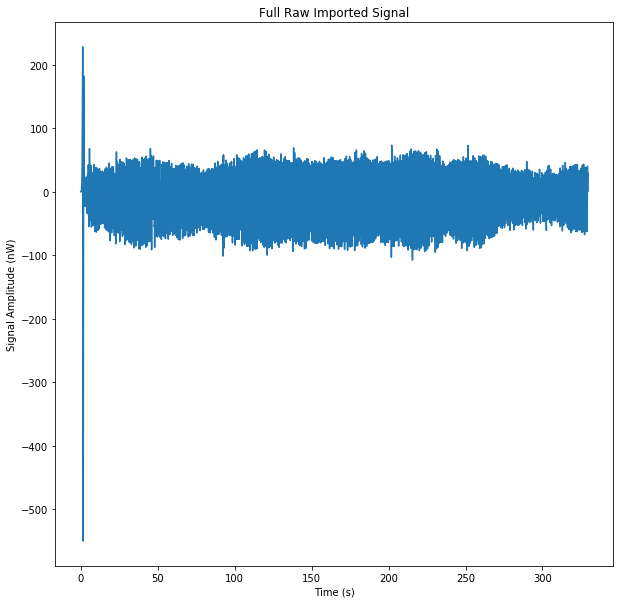

In [218]:
t_raw = [x/sampling_frequency for x in range(len(raw_signal))]
plt.figure(figsize=(10,10))
ax1 = plt.plot(t_raw, raw_signal)
plt.title('Full Raw Imported Signal')
plt.xlabel('Time (s)')
plt.ylabel('Signal Amplitude (nW)')

<p>Hmm, first couple of values seem to be representative of some sort of noise in the watch. Let's cut off the first 5 second of data from the signal and chalk it up as a calibration period.</p>

Text(0, 0.5, 'Signal Amplitude (nW)')

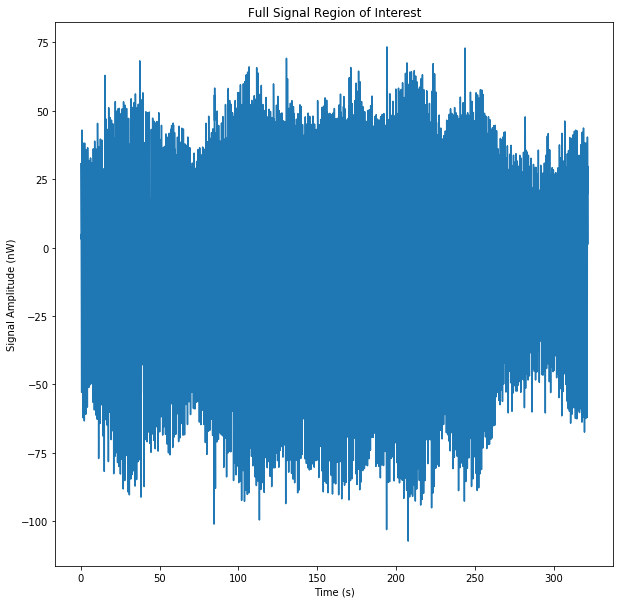

In [219]:
# Moving average filter
filter_length = 8
analysis_signal = np.convolve(
    analysis_signal,
    np.ones((8,))/8,
    mode='valid'
)

analysis_signal = raw_signal[500:]
t_signal = [x/sampling_frequency for x in range(len(analysis_signal))]
plt.figure(figsize=(10,10))
plt.plot(t_signal, analysis_signal)

plt.title('Full Signal Region of Interest')
plt.xlabel('Time (s)')
plt.ylabel('Signal Amplitude (nW)')

<p>Much better. Let's try to take a small representative region.</p>

Text(0, 0.5, 'Signal Amplitude (nW)')

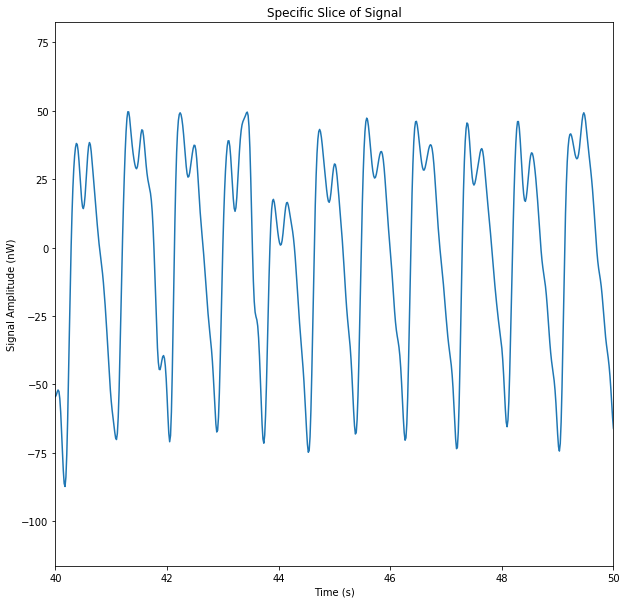

In [220]:
# Start of small signal slice in seconds
slice_start = 40
slice_end = 50

plt.figure(figsize=(10,10))
plt.plot(t_signal, analysis_signal)
axes = plt.gca()
axes.set_xlim(left=slice_start, right=slice_end)

plt.title('Specific Slice of Signal')
plt.xlabel('Time (s)')
plt.ylabel('Signal Amplitude (nW)')

<p>Now <i>that</i> is a truly terrible BVP signal. We've got our work cut out for us.</p>

<p>The logic for our algorithm is going to be to move from one BVP waveform to the next, so we'll need to start iterating based on diastolic troughs. Let's set up a pandas_df (basically the same as a matrix) to keep track of interesting metrics like this from our signal. Let's initialize this dataframe and then fill the diastolic trough values of it.</p>

In [221]:
features_df = pd.DataFrame()

,dia_locs,dia_locs_time,dia_vals
0,35,0.546875,-52.94
1,87,1.359375,-62.22
2,142,2.218750,-63.40
3,203,3.171875,-60.96
4,265,4.140625,-58.36
5,324,5.062500,-51.18
6,382,5.968750,-50.16
7,437,6.828125,-49.76
8,492,7.687500,-56.57
9,549,8.578125,-59.40


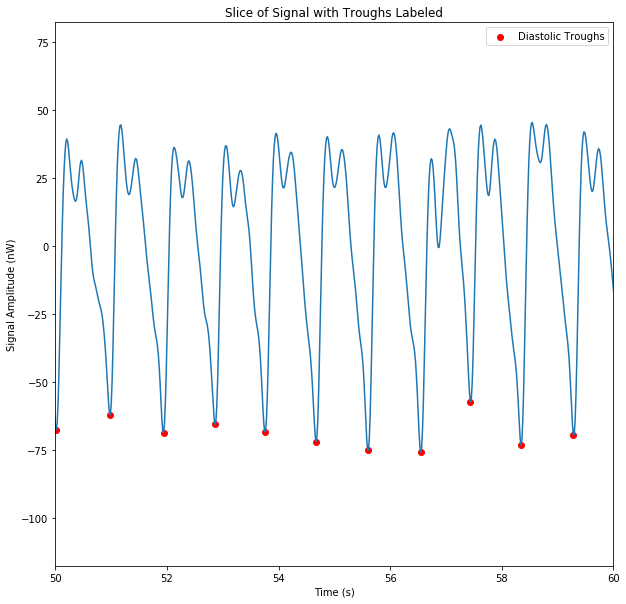

In [222]:
upside_down = [-1*x for x in analysis_signal]
dia_locs = find_peaks(upside_down, height=25)
dia_locs = dia_locs[0].tolist()

features_df['dia_locs'] = dia_locs
features_df['dia_locs_time'] = [x/sampling_frequency for x in dia_locs]
features_df['dia_vals'] = [analysis_signal[x] for x in dia_locs]    
    
features_df.head(10)

plt.figure(figsize=(10,10))

plt.plot(t_signal, analysis_signal)
ax1 = plt.scatter(features_df['dia_locs_time'], features_df['dia_vals'], c='r')

plt.title('Slice of Signal with Troughs Labeled')
plt.xlabel('Time (s)')
plt.ylabel('Signal Amplitude (nW)')
plt.legend(
    [ax1],
    ['Diastolic Troughs']
)

axes = plt.gca()
axes.set_xlim(left=slice_start+10, right=slice_end+10)

features_df.head(10)

<p>Alright, we're in business. We've got diastolic troughs picked out and we're starting to build our features dataframe. Don't worry if we have some false positive diastolic troughs at this stage. The real exclusion criteria logic has yet to come and should sufficiently recognize false positives in the signal for diastolic troughs.</p>

<p>The next step is where most of our algorithm logic takes place and it's sort of a bear, so I'll do my best to comment it well so it's followable and also try to make clear figures at the end that make it clear what we are doing.</p>

In [223]:
# Initialize lists for the global locations of the systolic peaks 
# and dicrotic notches.
global_sys = []
global_dic = []
inf_area_ratios = []
inf_area_locs = []

# Just makes things easier than referencing the df every time
dia_locs = features_df['dia_locs']

# Intialize variable that will count every waveform that meets our exclusion
# criteria. I.e., a waveform that we will accept to calculate inflection area
# ratio.
count = 0

# Begin iterating through each waveform 
for i in range(0,len(features_df['dia_locs'])-1):
    
    # Take parameters of the individual waveform that we are on. Beginning
    # and end are important but also waveform_signal since it represents
    # the actual data for this waveform we'll be operating on.
    waveform_start = dia_locs[i]
    waveform_end = dia_locs[i+1]  
    waveform_region = np.arange(waveform_start,waveform_end)
    waveform_signal = analysis_signal[waveform_start:waveform_end]
    
    # Take first and second derivative of signal. Then pad excess
    # values with zero to give us lists of the same length
    local_d1 = list(np.diff(waveform_signal));
    local_d1.insert(0, 0)
    local_d2 = list(np.diff(local_d1));
    local_d2.insert(0, 0)
    
    # Initialize counting variables
    signal_peaks_count = 0
    d1_peaks_count = 0
    
    # Initialize lists that will become columns for our features_df
    # later.
    signal_peaks = [];
    d1_peaks = [];
    sys_peaks = [];
    dic_notches = [];
    
    # Iterate through every value of the waveform
    for n in range(len(waveform_region)):
        
        # Looking for peaks in the signal
        if ((local_d1[n-1] > 0) and (local_d1[n] < 0)):
            
            signal_peaks.append(n)
            signal_peaks_count = signal_peaks_count + 1
          
        # If we've completed our first iteration of the waveform
        if (n == len(waveform_region)-1):
            
            # Begin iterating through the waveform again
            for m in range(1,len(waveform_region)):
                
                # Looking for peaks in the second derivative
                if ((local_d2[m-1] > 0) and (local_d2[m] < 0)):
                    
                    d1_peaks.append(m);
                    d1_peaks_count = d1_peaks_count + 1;
        
        # Begin our exclusion criteria. For now the only two criteria being
        # used are making sure there are no more than two systolic peaks detected
        # and that there is at least 1 peak in the first derivative detected.
        if (signal_peaks_count <= 2):
                if (d1_peaks_count >= 1):
                    
                    # Congratulations waveform, you've passed the exclusion criteria.
                    # Count goes up by one (we've found one waveform that will let us
                    # calculate inflection area ratio)
                    count = count + 1
                    
                    # Create list of (x,y) tuples for signal peaks and 
                    # first derivative peaks
                    for j in range(len(signal_peaks)):
                        sys_peaks.append((signal_peaks[j], waveform_signal[signal_peaks[j]]))

                    for j in range(len(d1_peaks)):
                        dic_notches.append((d1_peaks[j], waveform_signal[d1_peaks[j]]))
                    
                    # Sort systolic peaks by their x values then take the first
                    # one (the leftmost peak found in the signal). Append to 
                    # list of global systolic peaks
                    sys_peaks_sorted = sorted(sys_peaks, key=lambda x: x[0])
                    sys_peak = int(sys_peaks_sorted[0][0])
                    global_sys.append(int(waveform_start + sys_peak -1 ))
                    
                    # Sort dicrotic notches by their y values, then take
                    # the one that has the highest y value. Append to list 
                    # of global dicrotic notches
                    dic_notches_sorted = sorted(dic_notches, key=lambda x: x[1])
                    dic_notch = int(dic_notches_sorted[-1][0])
                    global_dic.append(int(waveform_start + dic_notch - 1))
                    
                    # Calcluate inflection area ratio
                    offset_wave = [x - min(waveform_signal) for x in waveform_signal]
                    
                    sys_region_area = np.trapz(offset_wave[0:dic_notch])
                    dia_region_area = np.trapz(offset_wave[dic_notch:len(offset_wave)])
                    
                    inf_area_ratios.append(dia_region_area / sys_region_area)
                    inf_area_locs.append(int((waveform_start + waveform_end) / 2.0))
                
                
# Use all the lists we created to create columns for our dataframe.
# Once this is complete we can actually export a csv file if desired
# That makes for more automated signal analysis and scalability if another
# researcher wants to use the results of our program.
features_df['sys_locs'] = pd.Series(global_sys)
features_df['sys_locs_time'] = pd.Series([x / sampling_frequency for x in global_sys])
features_df['sys_vals'] = pd.Series([analysis_signal[x] for x in global_sys])

features_df['dic_locs'] = pd.Series(global_dic)
features_df['dic_locs_time'] = pd.Series([x / sampling_frequency for x in global_dic])
features_df['dic_vals'] = pd.Series([analysis_signal[x] for x in global_dic])

features_df['inf_locs'] = pd.Series(inf_area_locs)
features_df['inf_locs_time']= pd.Series([x / sampling_frequency for x in inf_area_locs])
features_df['inf_vals'] = pd.Series(inf_area_ratios)

# We'll remove values over 10 because this represents a quite dead 
# patient if it is valid, so we'll assume it's an outlier.
features_df.loc[features_df['inf_vals'] > 10] = np.nan

features_df.head(10)

,dia_locs,dia_locs_time,dia_vals,sys_locs,sys_locs_time,sys_vals,dic_locs,dic_locs_time,dic_vals,inf_locs,inf_locs_time,inf_vals
0,35.0,0.546875,-52.94,47.0,0.734375,42.95,61.0,0.953125,15.02,61.0,0.953125,0.587624
1,87.0,1.359375,-62.22,99.0,1.546875,38.18,124.0,1.937500,4.00,114.0,1.781250,0.186583
2,142.0,2.218750,-63.40,155.0,2.421875,38.18,168.0,2.625000,26.28,172.0,2.687500,1.006192
3,203.0,3.171875,-60.96,216.0,3.375000,35.75,233.0,3.640625,27.29,234.0,3.656250,0.694918
4,265.0,4.140625,-58.36,277.0,4.328125,36.50,292.0,4.562500,22.41,294.0,4.593750,0.814525
5,324.0,5.062500,-51.18,337.0,5.265625,31.81,351.0,5.484375,20.04,353.0,5.515625,0.832273
6,382.0,5.968750,-50.16,395.0,6.171875,32.75,410.0,6.406250,17.36,409.0,6.390625,0.648280
7,437.0,6.828125,-49.76,450.0,7.031250,30.93,464.0,7.250000,15.57,464.0,7.250000,0.706214
8,492.0,7.687500,-56.57,506.0,7.906250,36.08,521.0,8.140625,23.43,520.0,8.125000,0.637857
9,549.0,8.578125,-59.40,563.0,8.796875,38.92,577.0,9.015625,24.58,578.0,9.031250,0.750500


Text(0, 0.5, 'Signal Amplitude (nW)')

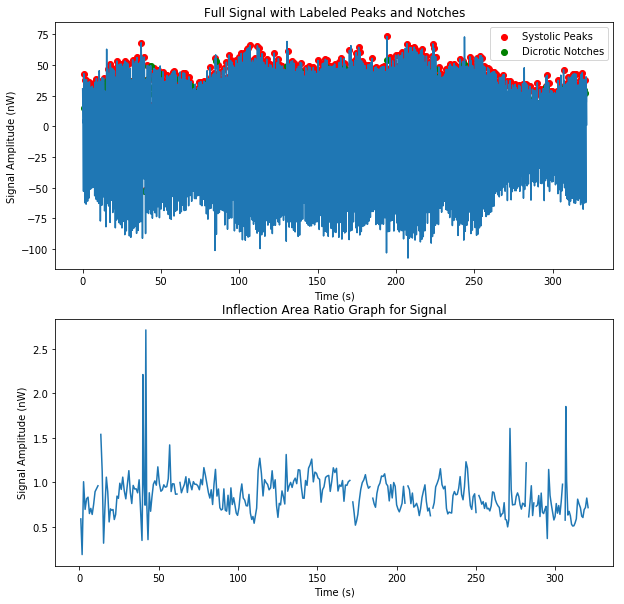

In [224]:
# Plotting the results of our iterating

plt.figure(figsize=(10,10))

plt.subplot(211)
plt.plot(t_signal, analysis_signal)
ax1 = plt.scatter(
    x=features_df['sys_locs_time'],
    y=features_df['sys_vals'],
    c='r'
)
ax2 = plt.scatter(
    x=features_df['dic_locs_time'],
    y=features_df['dic_vals'],
    c='g'
)

plt.title('Full Signal with Labeled Peaks and Notches')
plt.xlabel('Time (s)')
plt.ylabel('Signal Amplitude (nW)')
plt.legend(
    [ax1, ax2],
    ['Systolic Peaks', 'Dicrotic Notches']
)

plt.subplot(212)
plt.plot(features_df['inf_locs_time'],features_df['inf_vals'])

plt.title('Inflection Area Ratio Graph for Signal')
plt.xlabel('Time (s)')
plt.ylabel('Signal Amplitude (nW)')

(50, 60)

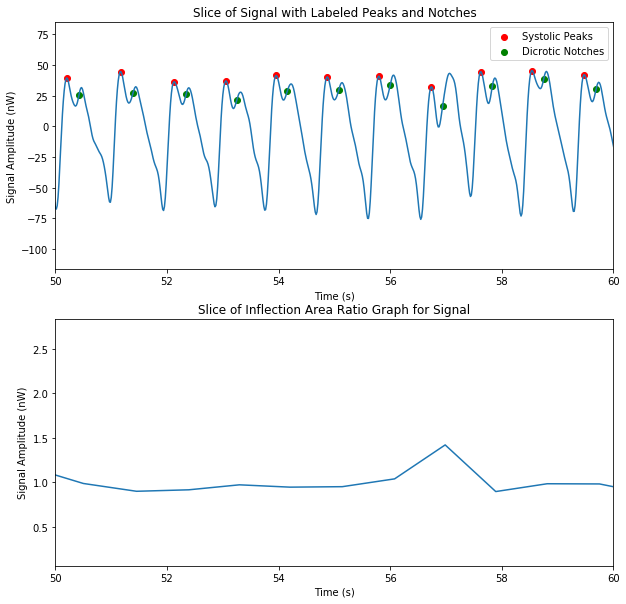

In [225]:
# Zoom
fig = plt.figure(figsize=(10,10))

plt.subplot(211)
plt.plot(t_signal, analysis_signal)
ax1 = plt.scatter(
    x=features_df['sys_locs_time'],
    y=features_df['sys_vals'],
    c='r'
)
ax2 = plt.scatter(
    x=features_df['dic_locs_time'],
    y=features_df['dic_vals'],
    c='g'
)

plt.title('Slice of Signal with Labeled Peaks and Notches')
plt.xlabel('Time (s)')
plt.ylabel('Signal Amplitude (nW)')
plt.legend(
    [ax1, ax2],
    ['Systolic Peaks', 'Dicrotic Notches']
)

axes = fig.gca()
axes.set_xlim(left=slice_start+10, right=slice_end+10)

plt.subplot(212)
plt.plot(features_df['inf_locs_time'],features_df['inf_vals'])

plt.title('Slice of Inflection Area Ratio Graph for Signal')
plt.xlabel('Time (s)')
plt.ylabel('Signal Amplitude (nW)')

axes = fig.gca()
axes.set_xlim(left=slice_start+10, right=slice_end+10)